Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:                 
построить не менее 4 визуализаций различных видов;                      
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;                   
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

In [58]:
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [96]:
#для анализа использую последние данные оценки уровня счастья в странах мира за 2019 год
df = pd.read_csv('2019.csv')

In [97]:
df.head(156)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [99]:
#пропусков нет
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [101]:
#по стат данным видно, что 75% стран имеют уровень соц поддержки выше, продолжительность жизни больше, больше свободы выбора.
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


Text(0, 0.5, 'Продолжительность жизни')

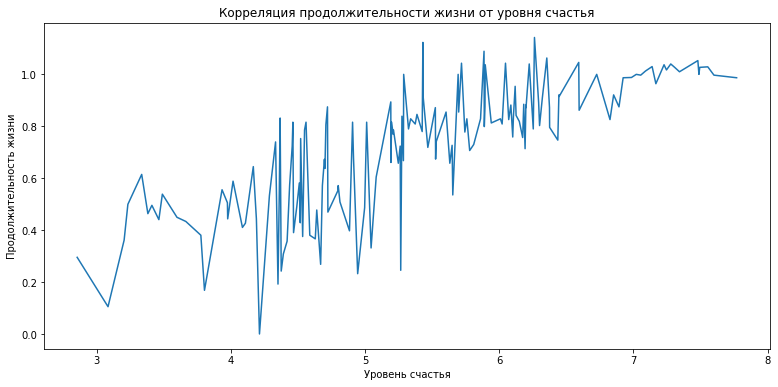

In [69]:
plt.plot(df.Score, df['Healthy life expectancy'])
plt.title('Корреляция продолжительности жизни от уровня счастья')
plt.xlabel('Уровень счастья')
plt.ylabel('Продолжительность жизни')

Простой график доказывает взаимосвязь продолжительности жизни от того, насколько счастлив человек. Страны где оценка счастья выше, продолжительность жизни в целом дольше.

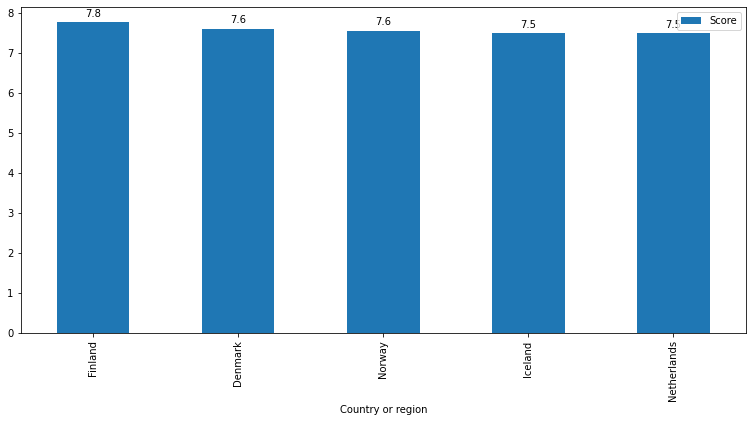

In [84]:
# топ-5 счастливых стран 
top5_country = df[['Score', 'Country or region']].groupby(by='Country or region').sum().sort_values(by='Score', ascending=False).head(5)
ax = top5_country.plot(kind='bar')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

Топ-5 счастливых стран в мире - Финляндия, Германия, Норвергия, Исландия, Нидерланды. В основном это страны Европы.

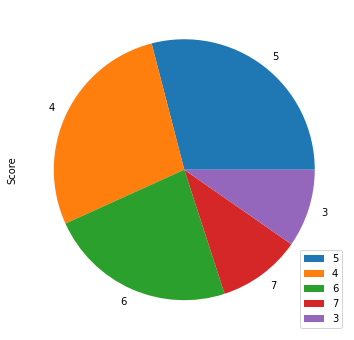

In [90]:
# структура оценок счастья 
top_countries = df['Score'].value_counts().sort_values(ascending = False).head(5)
ax = top_countries.plot(kind='pie')
ax.legend()

Доля наиболее счастливых стран в мире составляет примерно 35% от общего количества стран.

<AxesSubplot:title={'center':'Взаимосвязь свободы выбора и счастья жителей стран'}, xlabel='Freedom to make life choices', ylabel='Score'>

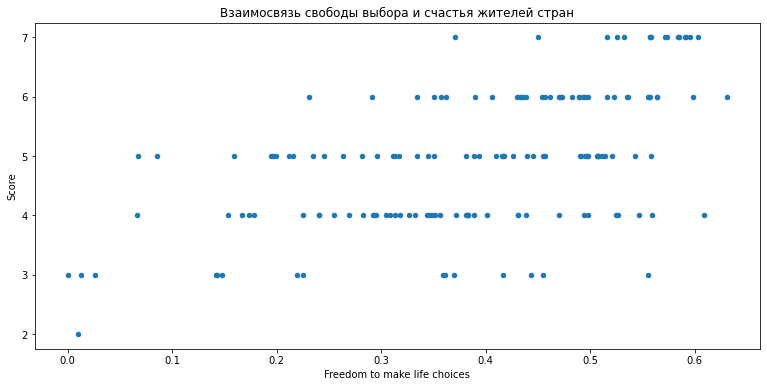

In [94]:
df.plot(kind='scatter', 
        x='Freedom to make life choices', 
        y='Score', 
        title='Взаимосвязь свободы выбора и счастья жителей стран')

В точечной диаграмме прослеживается взаимосвязь свободы выбора и уровеня счатья жителей стран, чем больше свободы у людей тем они счастлвее.